In [ ]:
!pip3 install pandas seaborn matplotlib

In [5]:
%cd ..

/Users/hiroy/Projects/u-aizu/llm/llama2.c


/Users/hiroy/Projects/u-aizu/llm/llama2.c/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import pandas as pd
import glob

csv_files = glob.glob('test/matmul_times_layer_*.csv')
dfs = []
for file in csv_files:
    df = pd.read_csv(file, index_col=0)
    dfs.append(df)

result_df = pd.concat(dfs, axis=1)

result_df['Total Time (ms)'] = result_df.sum(axis=1)

display(result_df)

result_df.to_csv('test/total_matmul_times.csv', index=False)

,Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),...,Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Total Time (ms)
1,28.678,16.394,16.459,30.098,27.358,17.598,18.785,31.462,16.846,15.916,...,15.079,23.769,13.759,15.956,16.136,23.007,15.509,25.514,18.934,657.805
2,23.757,25.892,32.904,16.978,22.060,18.490,17.538,29.650,32.329,20.707,...,20.770,23.808,16.265,21.846,15.312,22.607,15.725,15.773,29.071,661.287
3,22.061,20.000,23.912,16.560,16.165,16.731,28.342,15.608,22.200,15.409,...,15.542,20.706,16.246,16.032,25.397,27.484,19.989,20.053,27.620,645.069
4,23.361,28.349,15.600,30.955,15.045,17.055,16.082,15.500,16.724,26.680,...,20.251,18.539,25.405,19.374,15.623,16.285,16.344,16.382,17.002,629.149
5,69.239,56.386,63.478,87.158,69.759,55.127,61.469,65.840,71.615,71.124,...,49.783,52.931,46.482,50.088,67.213,62.004,52.091,49.606,56.713,1865.012
6,65.755,43.951,64.022,70.548,56.236,55.933,67.409,60.335,54.489,28.904,...,47.212,50.671,59.661,48.287,49.586,59.611,52.054,51.481,61.907,1702.921
7,44.800,70.167,52.186,59.150,53.751,43.775,54.920,46.274,61.798,65.192,...,55.073,49.869,47.500,48.405,50.001,58.559,51.237,59.610,51.805,1708.975


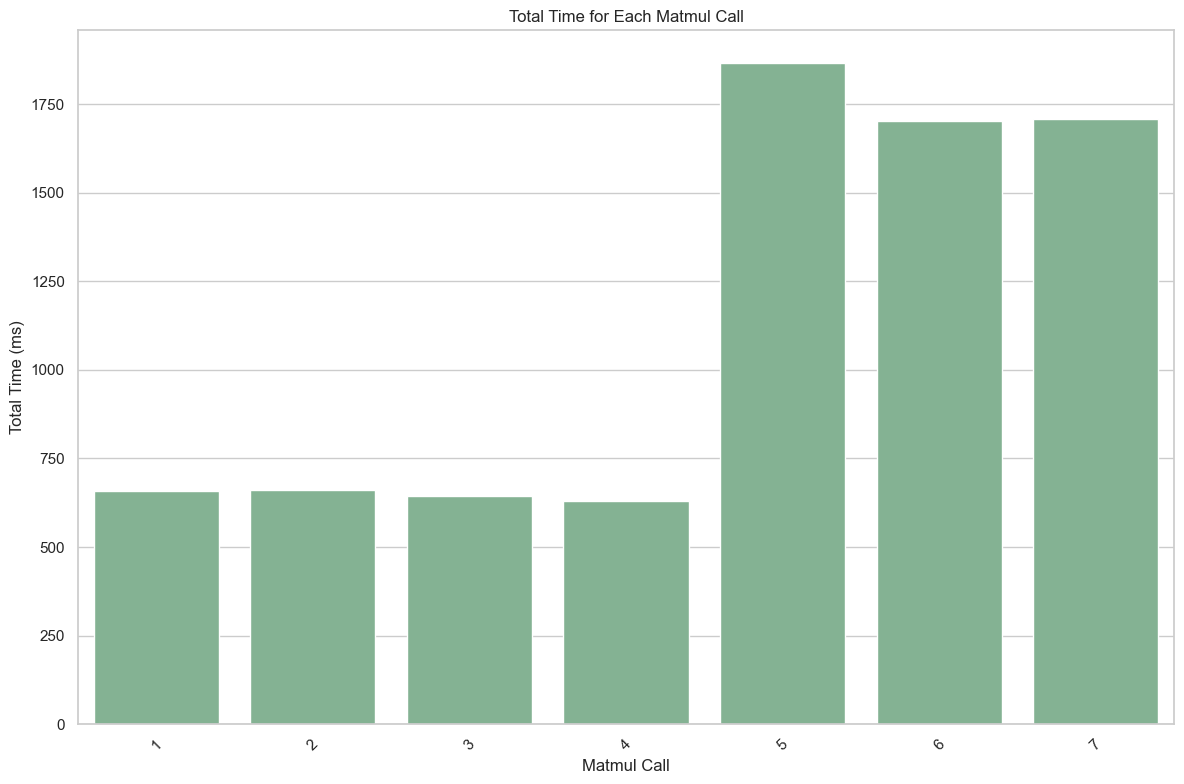

<Figure size 640x480 with 0 Axes>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.barplot(x=result_df.index, y=result_df['Total Time (ms)'])
plt.xlabel('Matmul Call')
plt.ylabel('Total Time (ms)')
plt.title('Total Time for Each Matmul Call')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


plt.savefig('test/total_matmul_times.png')

### 1~4番目のmatmul: attentionの計算(Q, K, Vの内積)を行う

### 5~7番目のmatmul: attentionで計算した結果を使って、線形層での行列計算

###  -> FFN in PyTorch we have: self.w2(F.silu(self.w1(x)) * self.w3(x)) で時間がかかっている